In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve
)
from sklearn.linear_model import LogisticRegression


In [100]:
df=pd.read_excel("Downloads/Customer_Churn_Data_Large.xlsx")

In [101]:
df.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel
0,1,62,M,Single,Low
1,2,65,M,Married,Low
2,3,18,M,Single,Low
3,4,21,M,Widowed,Low
4,5,21,M,Divorced,Medium


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1000 non-null   int64 
 1   Age            1000 non-null   int64 
 2   Gender         1000 non-null   object
 3   MaritalStatus  1000 non-null   object
 4   IncomeLevel    1000 non-null   object
dtypes: int64(2), object(3)
memory usage: 39.2+ KB


In [103]:
df.describe()

,CustomerID,Age
count,1000.000000,1000.000000
mean,500.500000,43.267000
std,288.819436,15.242311
min,1.000000,18.000000
25%,250.750000,30.000000
50%,500.500000,43.000000
75%,750.250000,56.000000
max,1000.000000,69.000000


In [104]:
df.columns


Index(['CustomerID', 'Age', 'Gender', 'MaritalStatus', 'IncomeLevel'], dtype='object')

In [105]:
df.shape

(1000, 5)

In [106]:
df.isnull().sum()

CustomerID       0
Age              0
Gender           0
MaritalStatus    0
IncomeLevel      0
dtype: int64

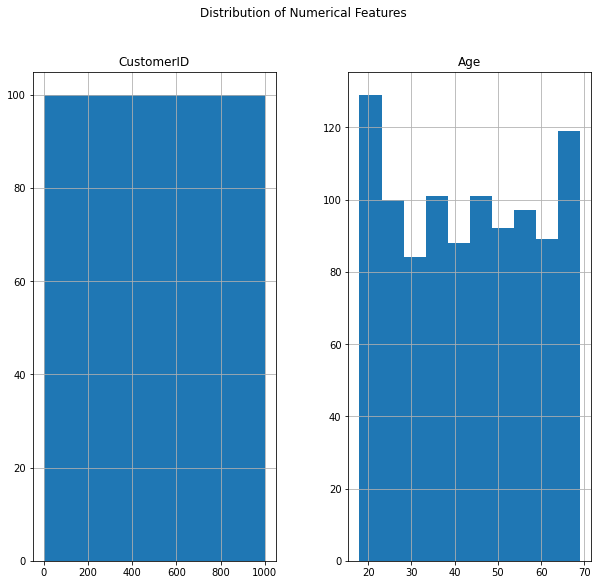

In [107]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

df[numeric_cols].hist(figsize=(10, 9))
plt.suptitle("Distribution of Numerical Features")
plt.show()



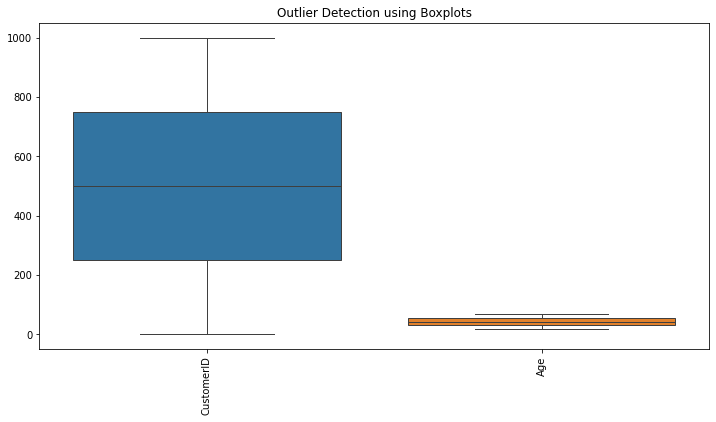

In [108]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title("Outlier Detection using Boxplots")
plt.show()


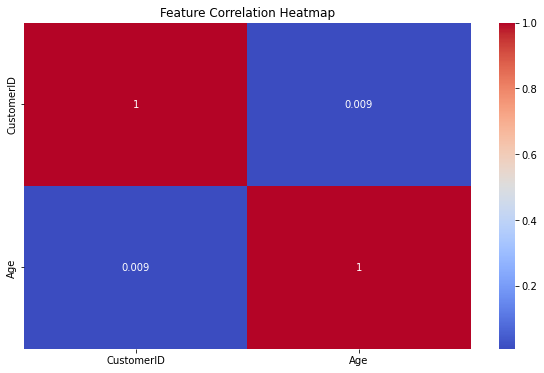

In [109]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [110]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = np.clip(df[col], lower, upper)


In [111]:
categorical_cols = ['Gender', 'MaritalStatus', 'IncomeLevel']
numeric_cols=['Age']

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)


In [112]:
df.to_csv("cleaned_customer_churn.csv",index=False, encoding="utf-8-sig")

print("✅ Duplicates removed and file saved!")
preprocessor

✅ Duplicates removed and file saved!


,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [113]:
df.to_csv("cleaned_customer_churn.csv")
df

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel
0,1,62,M,Single,Low
1,2,65,M,Married,Low
2,3,18,M,Single,Low
3,4,21,M,Widowed,Low
4,5,21,M,Divorced,Medium
...,...,...,...,...,...
995,996,54,F,Single,Low
996,997,19,M,Widowed,High
997,998,47,M,Married,Low
998,999,23,M,Widowed,High


In [114]:
np.random.seed(42)
df["Churn"] = np.random.choice([0, 1], size=len(df1), p=[0.8, 0.2])
df

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,Churn
0,1,62,M,Single,Low,0
1,2,65,M,Married,Low,1
2,3,18,M,Single,Low,0
3,4,21,M,Widowed,Low,0
4,5,21,M,Divorced,Medium,0
...,...,...,...,...,...,...
995,996,54,F,Single,Low,0
996,997,19,M,Widowed,High,1
997,998,47,M,Married,Low,0
998,999,23,M,Widowed,High,1


In [115]:
# Separate features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]


In [116]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [117]:
pipeline=Pipeline([
    ('preprocessor',preprocessor),
    ('classifier',RandomForestClassifier(n_estimators=100,random_state=42))
])

In [118]:
pipeline.fit(X_train,y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [119]:
print("Model training Complete")

Model training Complete


In [120]:
y_pred=pipeline.predict(X_test)

In [122]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Model Accuracy:{accuracy:.2f}")

Model Accuracy:0.7


In [124]:

y_prob = pipeline.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       160
           1       0.21      0.17      0.19        40

    accuracy                           0.70       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.68      0.70      0.69       200

ROC-AUC: 0.49624999999999997


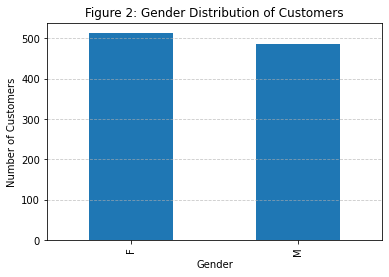

In [125]:

plt.figure(figsize=(6, 4))
df['Gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Figure 2: Gender Distribution of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

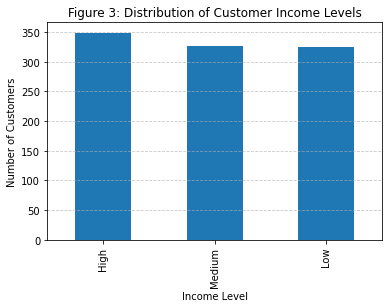

In [126]:
plt.figure(figsize=(6, 4))
df['IncomeLevel'].value_counts().plot(kind='bar')
plt.xlabel('Income Level')
plt.ylabel('Number of Customers')
plt.title('Figure 3: Distribution of Customer Income Levels')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

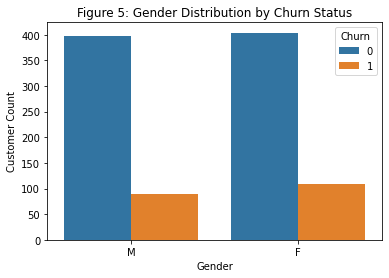

In [127]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', hue='Churn')
plt.title('Figure 5: Gender Distribution by Churn Status')
plt.xlabel('Gender')
plt.ylabel('Customer Count')
plt.show()